In [49]:
import pandas as pd
data=data=pd.read_csv('titanic-passengers.csv' ,sep=";" )


In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [51]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
data['Age'].mean()

29.69911764705882

In [53]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [54]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


In [56]:
data = data.drop(["PassengerId","SibSp","Parch","Ticket",], axis=1)
data

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,52.0000,B71,S
...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,30.0708,NaN,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,7.2292,NaN,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,8.6625,NaN,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,7.8958,NaN,S


In [57]:
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,13.0000,NaN,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,7.8542,NaN,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,21.0750,NaN,S
4,0,1,"Davidson, Mr. Thornton",male,31.0,52.0000,B71,S


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Age','Fare']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.67


<AxesSubplot:xlabel='Age', ylabel='Survived'>

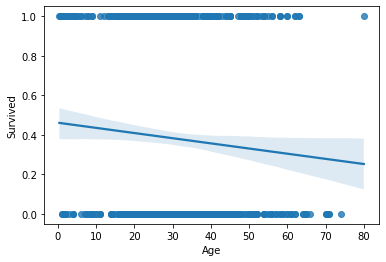

In [59]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

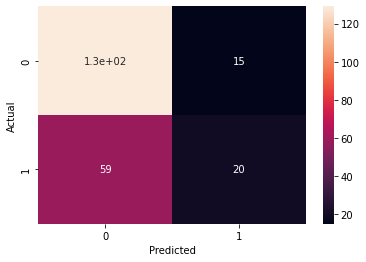

In [60]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       144
           1       0.57      0.25      0.35        79

    accuracy                           0.67       223
   macro avg       0.63      0.57      0.56       223
weighted avg       0.65      0.67      0.63       223



In [65]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [66]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

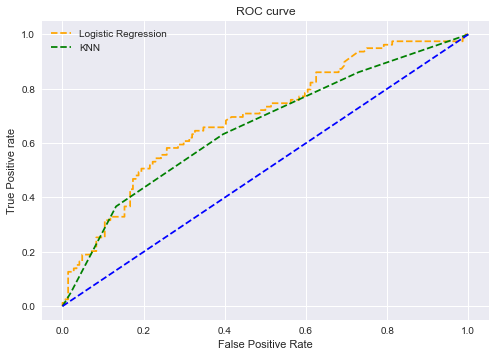

In [67]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();